# Uploading the data

## Importing the data 

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.linear_model import Lasso # Lasso for regression
from sklearn.linear_model import ARDRegression # ARDRegression for regression
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
ap_chef = pd.read_excel(io=file)

## Initial exploration of variables

### Distinguising variable types

In [2]:
# LARGEST_ORDER_SIZE is incorrectly labelled and should be AVERAGE_MEALS_PER_CUST
ap_chef = ap_chef.rename(columns={'LARGEST_ORDER_SIZE' : 'AVERAGE_MEALS_PER_CUST'})

# Organizing data based on type
    # Continuous
continuous = ['TOTAL_MEALS_ORDERED',
            'AVG_TIME_PER_SITE_VISIT',
            'AVG_PREP_VID_TIME',
            'TOTAL_PHOTOS_VIEWED']
   
    # Interval
interval = ['CROSS_SELL_SUCCESS',
            'CONTACTS_W_CUSTOMER_SERVICE',
            'PRODUCT_CATEGORIES_VIEWED',
            'UNIQUE_MEALS_PURCH',
            'MOBILE_NUMBER',
            'CANCELLATIONS_BEFORE_NOON',
            'CANCELLATIONS_AFTER_NOON',
            'EARLY_DELIVERIES',
            'LATE_DELIVERIES',
            'PACKAGE_LOCKER',
            'AVG_CLICKS_PER_VISIT',
            'REFRIGERATED_LOCKER',
            'AVERAGE_MEALS_PER_CUST',
            'MASTER_CLASSES_ATTENDED',
            'MEDIAN_MEAL_RATING']
        
    # Categorical
categorical = ['NAME',
                'EMAIL',
                'FIRST_NAME',
                'FAMILY_NAME']

### Exploring the dependent variable

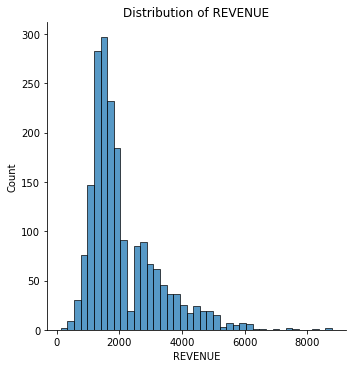

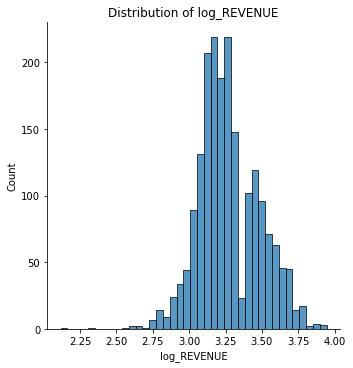

The data appears to be positively skewed, though more normally
distributed after a log transformation. Interesting gap around the $2200 mark
with very few data points. Does that represent two different cutomer segments
at different price points?


In [3]:
# Generating plot for REVENUE
sns.displot(x  = 'REVENUE',
            data = ap_chef)
plt.title('Distribution of REVENUE')
plt.show()

# Exploring our dependent variable REVENUE with log transformation

# Creating log transformation
ap_chef['log_REVENUE'] = np.log10(ap_chef['REVENUE'])

# Generating plot for log_REVENUE
sns.displot(x  = 'log_REVENUE',
            data = ap_chef)
plt.title('Distribution of log_REVENUE')
plt.show()

# ANALYSIS
print ("""The data appears to be positively skewed, though more normally
distributed after a log transformation. Interesting gap around the $2200 mark
with very few data points. Does that represent two different cutomer segments
at different price points?""")

### Exploring the continuous variables

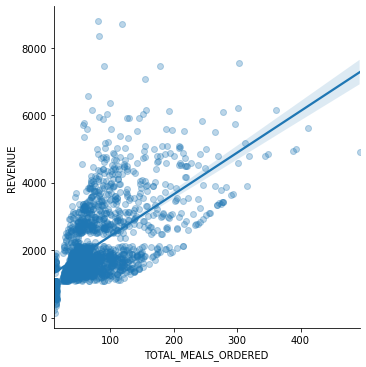

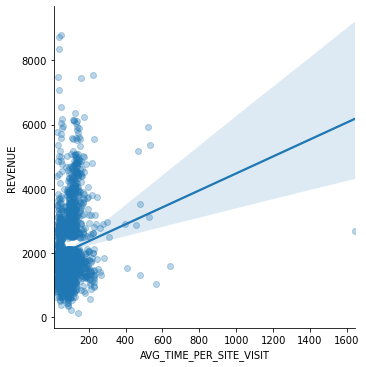

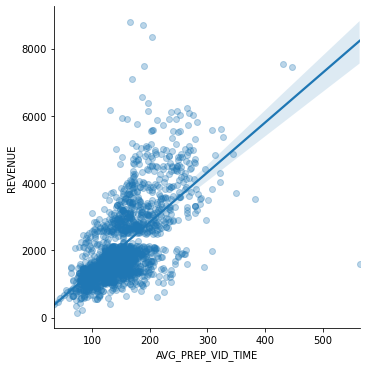

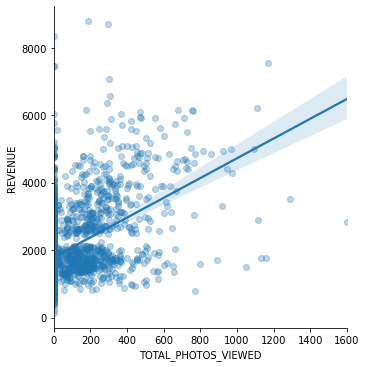

In [4]:
# loop to generate plots
for var in continuous:
    sns.lmplot(x    = var,
               y    = 'REVENUE',
               scatter = True,
               scatter_kws={'alpha':0.3},
               data = ap_chef)
    plt.xlabel(xlabel = var)
    plt.ylabel(ylabel = 'REVENUE')
    plt.show()

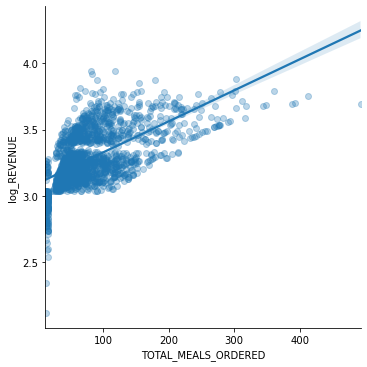

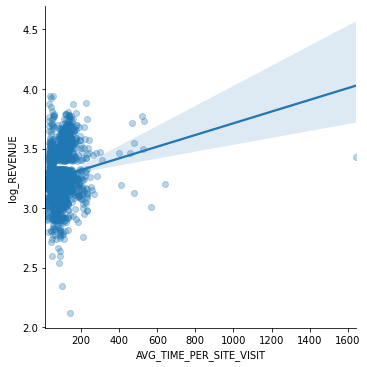

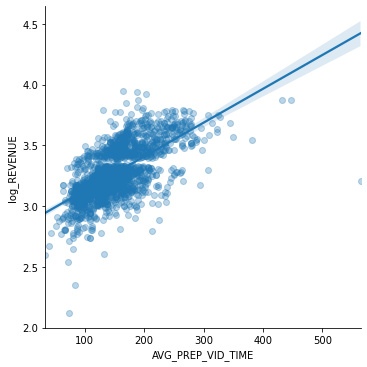

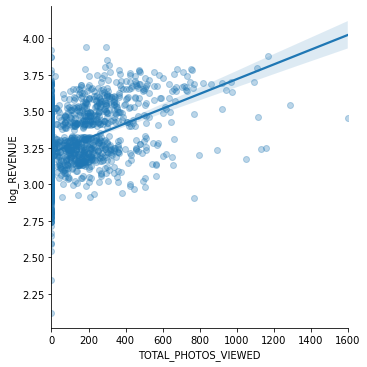

In [5]:
# loop to generate plots
for var in continuous:
    sns.lmplot(x    = var,
               y    = 'log_REVENUE',
               scatter = True,
               scatter_kws={'alpha':0.3},
               data = ap_chef)
    plt.xlabel(xlabel = var)
    plt.ylabel(ylabel = 'log_REVENUE')
    plt.show()

#### Effect of log 

In [6]:
# Creating logs of all continous variables
ap_chef['log_TOTAL_MEALS_ORDERED']     = np.log10(ap_chef['TOTAL_MEALS_ORDERED'])
ap_chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(ap_chef['AVG_TIME_PER_SITE_VISIT'])
ap_chef['log_AVG_PREP_VID_TIME']       = np.log10(ap_chef['AVG_PREP_VID_TIME'])

# creating a function to explore correlation with and without log
def log_correlation (var, log_var):
    log_corr = ap_chef.loc[ : , ['REVENUE',
                              'log_REVENUE',
                              var,
                              log_var] ].corr(method='pearson').round(decimals = 2)
    table = log_corr.loc[ ['REVENUE', 'log_REVENUE'],
                          [var, log_var] ]
    print (table)

# instantiating the correlation for continuous variables
log_correlation ('TOTAL_MEALS_ORDERED', 'log_TOTAL_MEALS_ORDERED')
log_correlation ('AVG_TIME_PER_SITE_VISIT', 'log_AVG_TIME_PER_SITE_VISIT')
log_correlation ('AVG_PREP_VID_TIME', 'log_AVG_PREP_VID_TIME')

# ANALYSIS
print ("""
TOTAL_MEALS_ORDERED: Clear correlation which is stronger with log. Concentration
of the data around the x-axis. Closer look at a distribution plot shows a dip 
at 20 orders. Will be exploring this break point more closely
AVG_TIME_PER_SITE_VISIT
AVG_PREP_VID_TIME: Clear correlation which is stronger with log
TOTAL_PHOTOS_VIEWED: significant number of customers did not view any pictures.
Will be creating a dummy variable to see it's influence
""")

             TOTAL_MEALS_ORDERED  log_TOTAL_MEALS_ORDERED
REVENUE                     0.60                     0.61
log_REVENUE                 0.61                     0.69
             AVG_TIME_PER_SITE_VISIT  log_AVG_TIME_PER_SITE_VISIT
REVENUE                         0.14                         0.15
log_REVENUE                     0.14                         0.15
             AVG_PREP_VID_TIME  log_AVG_PREP_VID_TIME
REVENUE                   0.64                   0.63
log_REVENUE               0.65                   0.67

TOTAL_MEALS_ORDERED: Clear correlation which is stronger with log. Concentration
of the data around the x-axis. Closer look at a distribution plot shows a dip 
at 20 orders. Will be exploring this break point more closely
AVG_TIME_PER_SITE_VISIT
AVG_PREP_VID_TIME: Clear correlation which is stronger with log
TOTAL_PHOTOS_VIEWED: significant number of customers did not view any pictures.
Will be creating a dummy variable to see it's influence



### Exploring the interval variables 

#### Visual exploration 

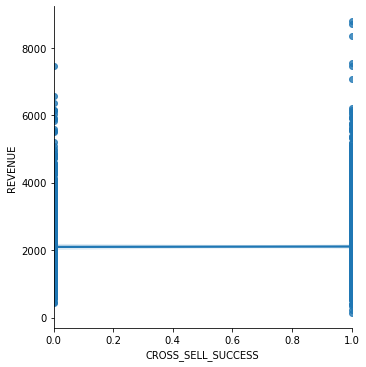

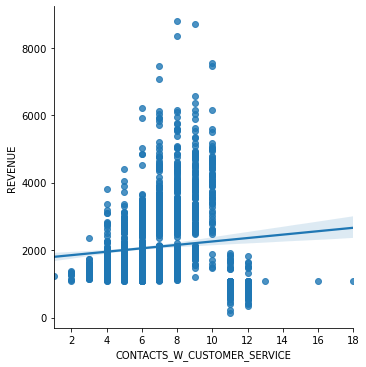

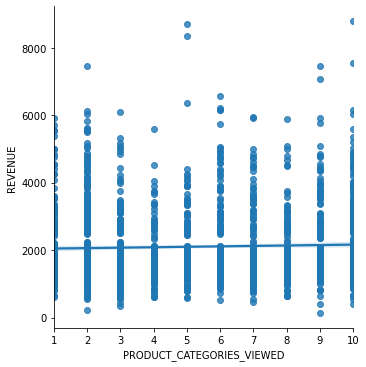

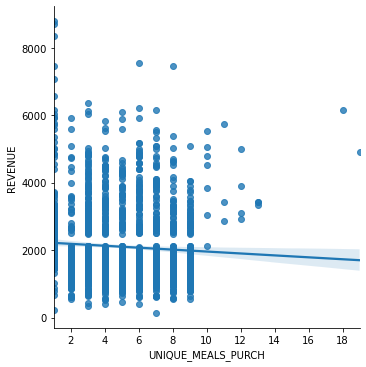

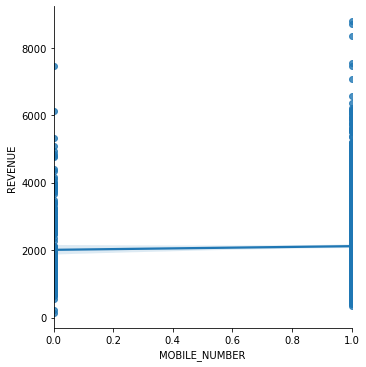

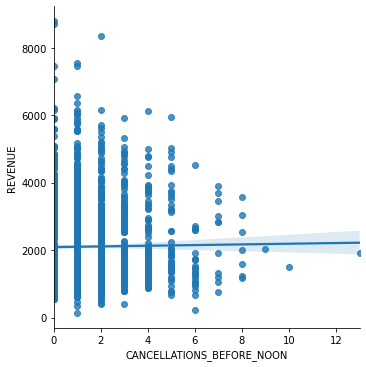

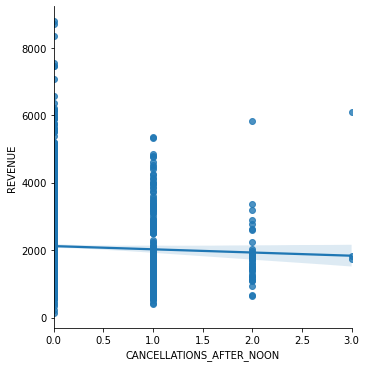

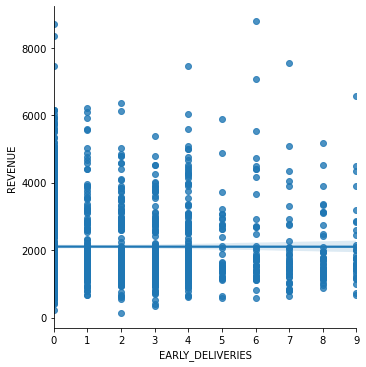

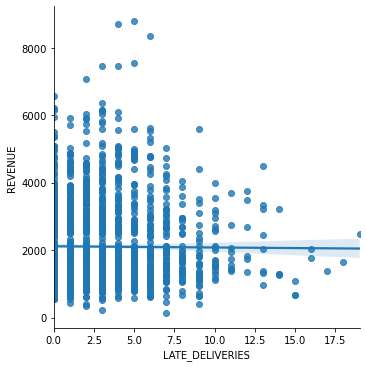

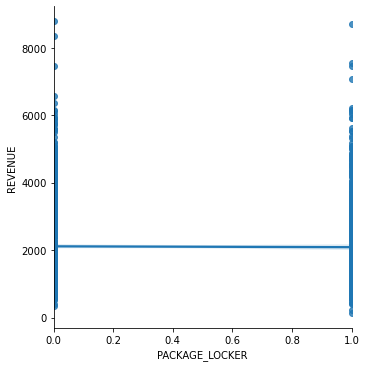

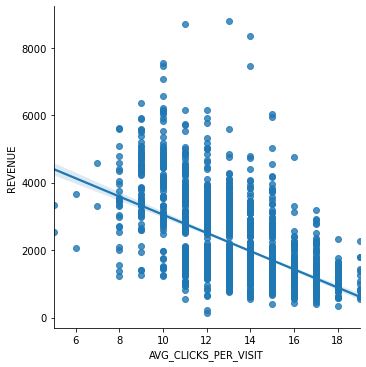

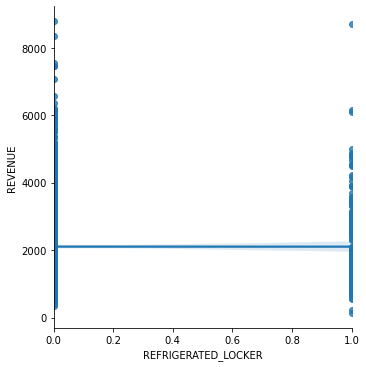

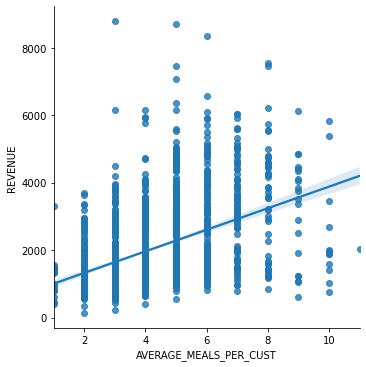

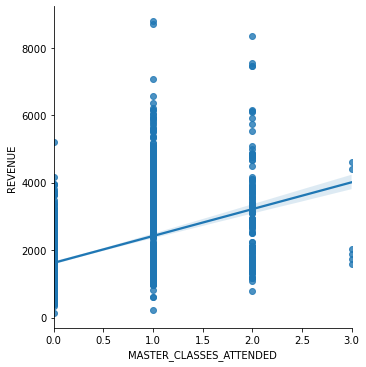

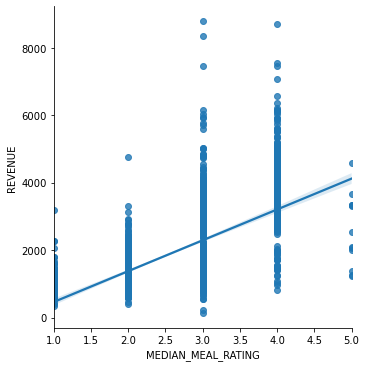

In [7]:
# creating scatterplots of interval variables to view any correlations

# loop to generate plots
for var in interval:
    sns.lmplot(x       = var,
               y       ='REVENUE',
               data    = ap_chef)
    plt.xlabel(xlabel = var)
    plt.ylabel(ylabel = 'REVENUE')
    plt.show()

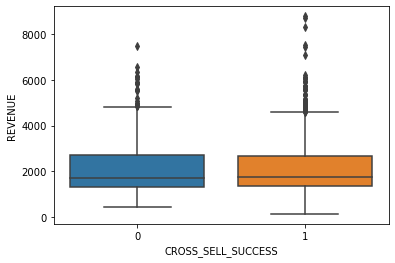

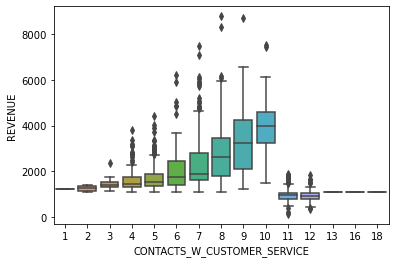

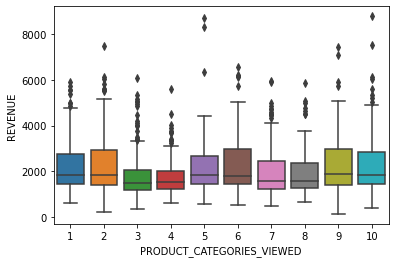

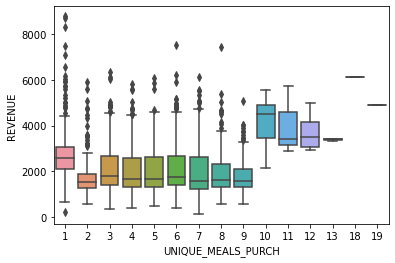

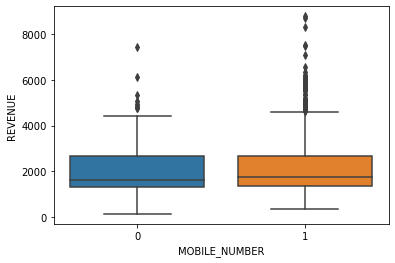

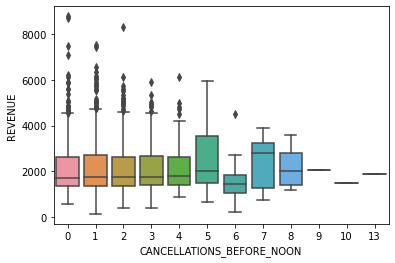

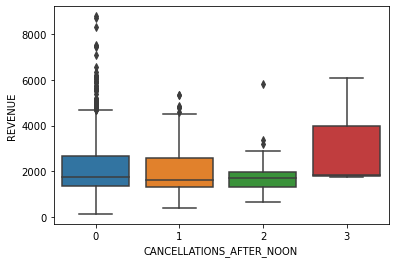

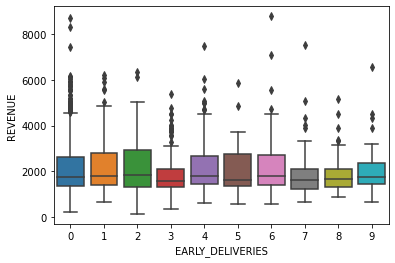

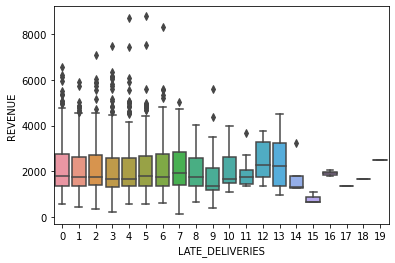

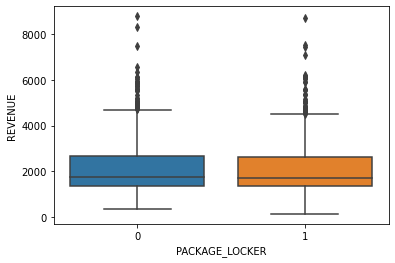

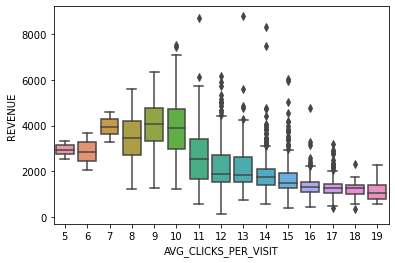

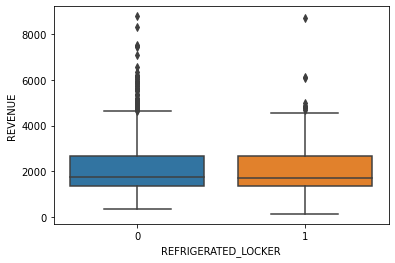

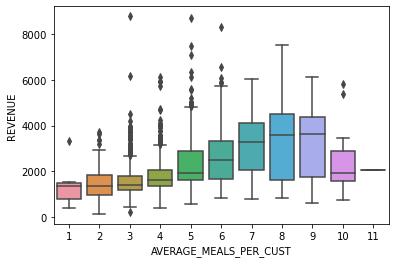

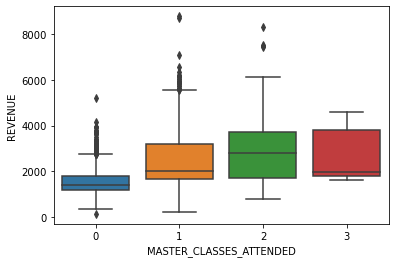

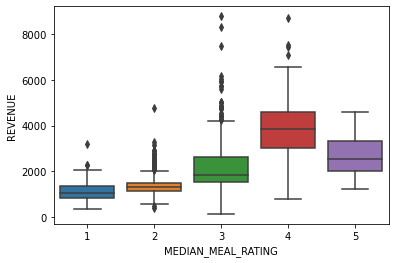

In [8]:
# creating boxplots of interval variables to view any correlations

# loop to generate plots
for var in interval:
    sns.boxplot(x       = var,
               y       ='REVENUE',
               data    = ap_chef)
    plt.xlabel(xlabel = var)
    plt.ylabel(ylabel = 'REVENUE')
    plt.show()

#### Correlation between features

In [9]:
## Exploring correlation with interval variables

# generating the correlation data
ap_chef_corr = ap_chef.corr(method = 'pearson').round(decimals = 2)

# checking the correlations for the interval variables
print (ap_chef_corr.loc['REVENUE', interval] \
                .sort_values(ascending = False))

MEDIAN_MEAL_RATING             0.61
MASTER_CLASSES_ATTENDED        0.45
AVERAGE_MEALS_PER_CUST         0.44
CONTACTS_W_CUSTOMER_SERVICE    0.10
PRODUCT_CATEGORIES_VIEWED      0.03
MOBILE_NUMBER                  0.03
CANCELLATIONS_BEFORE_NOON      0.01
CROSS_SELL_SUCCESS             0.00
EARLY_DELIVERIES              -0.00
REFRIGERATED_LOCKER           -0.00
LATE_DELIVERIES               -0.01
PACKAGE_LOCKER                -0.01
CANCELLATIONS_AFTER_NOON      -0.04
UNIQUE_MEALS_PURCH            -0.06
AVG_CLICKS_PER_VISIT          -0.55
Name: REVENUE, dtype: float64


In [10]:
# ANALYSIS
print("""
CONTACTS_W_CUSTOMER_SERVICE: trend significantly changes after 10
UNIQUE_MEALS_PURCH: jump in the data after 9
AVG_CLICKS_PER_VISIT: one trend through 9, then a different one after 10
AVERAGE_MEALS_PER_CUST: trend changes at 8
MEDIAN_MEAL_RATING: change in the trend at 4

We will be creating dummy variables at these break-even points to see whether
it is statistically significant to be on one side of the trend or the other.

Furthermore, the strongest correlations with revenue come from the following
four variables: MEDIAN_MEAL_RATING, MASTER_CLASSES_ATTENDED, 
AVERAGE_MEALS_PER_CUST, AVG_CLICKS_PER_VISIT
""")


CONTACTS_W_CUSTOMER_SERVICE: trend significantly changes after 10
UNIQUE_MEALS_PURCH: jump in the data after 9
AVG_CLICKS_PER_VISIT: one trend through 9, then a different one after 10
AVERAGE_MEALS_PER_CUST: trend changes at 8
MEDIAN_MEAL_RATING: change in the trend at 4

We will be creating dummy variables at these break-even points to see whether
it is statistically significant to be on one side of the trend or the other.

Furthermore, the strongest correlations with revenue come from the following
four variables: MEDIAN_MEAL_RATING, MASTER_CLASSES_ATTENDED, 
AVERAGE_MEALS_PER_CUST, AVG_CLICKS_PER_VISIT



# Engineering new variables

## Binary variables from earlier findings

In [11]:
# Creating dummy variables
ap_chef['TOTAL_MEALS_ORDERED_20']          = 0
ap_chef['TOTAL_PHOTOS_VIEWED_0']          = 0
ap_chef['CONTACTS_W_CUSTOMER_SERVICE_10'] = 0
#ap_chef['UNIQUE_MEALS_PURCH_9']           = 0
ap_chef['AVG_CLICKS_PER_VISIT_10']        = 0
#ap_chef['AVERAGE_MEALS_PER_CUST_8']       = 0
#ap_chef['MEDIAN_MEAL_RATING_4']           = 0

# iterating over original column to change values in the new feature column
for index, value in ap_chef.iterrows():

    if ap_chef.loc[index, 'TOTAL_MEALS_ORDERED'] > 20:
        ap_chef.loc[index, 'TOTAL_MEALS_ORDERED_20'] = 1
    
    if ap_chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        ap_chef.loc[index, 'TOTAL_PHOTOS_VIEWED_0'] = 1
    
    if ap_chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > 10:
        ap_chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE_10'] = 1
        
#    if ap_chef.loc[index, 'UNIQUE_MEALS_PURCH'] > 9:
#        ap_chef.loc[index, 'UNIQUE_MEALS_PURCH_9'] = 1
        
    if ap_chef.loc[index, 'AVG_CLICKS_PER_VISIT'] > 10:
        ap_chef.loc[index, 'AVG_CLICKS_PER_VISIT_10'] = 1

#    if ap_chef.loc[index, 'AVERAGE_MEALS_PER_CUST'] > 8:
#        ap_chef.loc[index, 'AVERAGE_MEALS_PER_CUST_8'] = 1

#    if ap_chef.loc[index, 'MEDIAN_MEAL_RATING'] > 4:
#        ap_chef.loc[index, 'MEDIAN_MEAL_RATING_4'] = 1
        
# ANALYSIS
print("""
The following categories have fewer than 100 observations in the 0 or 1
category. As such, they will not be added to our dataset:
UNIQUE_MEALS_PURCH_9, AVERAGE_MEALS_PER_CUST_9, MEDIAN_MEAL_RATING_4""")


The following categories have fewer than 100 observations in the 0 or 1
category. As such, they will not be added to our dataset:
UNIQUE_MEALS_PURCH_9, AVERAGE_MEALS_PER_CUST_9, MEDIAN_MEAL_RATING_4


## Working with categorical variables

### Email domain type

Customers using email addresses from different domain types may exhibit
different behavior. Creating variables so this can be further explored


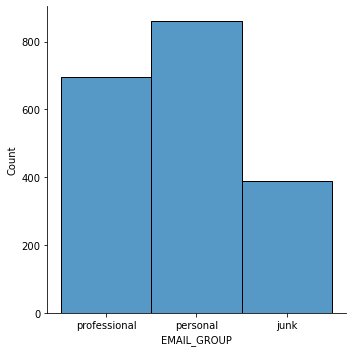

In [12]:
# Theory
print("""Customers using email addresses from different domain types may exhibit
different behavior. Creating variables so this can be further explored""")

# Creating new variable
ap_chef['EMAIL_GROUP'] = 0

# Creating loop to distinguish email categories
for index, obs in ap_chef.iterrows() :
    
    if 'gmail.com' in ap_chef.loc[index, 'EMAIL'] or \
            'yahoo.com' in ap_chef.loc[index, 'EMAIL'] or \
            'protonmail.com' in ap_chef.loc[index, 'EMAIL']:
        
        ap_chef.loc[index, 'EMAIL_GROUP'] = 'personal'
    
    elif 'me.com' in ap_chef.loc[index, 'EMAIL'] or \
            'aol.com' in ap_chef.loc[index, 'EMAIL'] or \
            'hotmail.com' in ap_chef.loc[index, 'EMAIL'] or \
            'live.com' in ap_chef.loc[index, 'EMAIL'] or \
            'msn.com' in ap_chef.loc[index, 'EMAIL'] or \
            'passport.com' in ap_chef.loc[index, 'EMAIL']:
        
        ap_chef.loc[index, 'EMAIL_GROUP'] = 'junk'
    
    else :
        
        ap_chef.loc[index, 'EMAIL_GROUP'] = 'professional'

# examining the dsitribution of each category        
sns.displot (ap_chef['EMAIL_GROUP'])
plt.show()

In [13]:
# creating dummy variables
one_hot_EMAIL = pd.get_dummies(ap_chef['EMAIL_GROUP'])

# dropping categorical variable after it's been encoded
ap_chef = ap_chef.drop('EMAIL_GROUP', axis=1)

# joining the data together
ap_chef = ap_chef.join(one_hot_EMAIL)

###  Gender based on first names

In [14]:
# Generating a list of unique first neames and running the gender.Detector()
# funciton on it. The unknown names were then manually researched and
# imputed. This list has been exproted as an excel which is what we will be
# using going forward

# importing gender package
#import gender_guesser.detector as gender

# list of unique first names (to reduce what needs to be processed)
#names = data['FIRST_NAME'].unique()

# placeholder list
#placeholder_lst = []
#time = 1

# looping to guess gender
#for name in names:
#    guess = gender.Detector().get_gender(name)
#    print(time)
#    time += 1
#    placeholder_lst.append([name , guess])


# converting list into a series
#gender = pd.Series(placeholder_lst)


# checking results
#friends.head(n = 5)
#friends.loc[ : ,['first_name','gender_guess']]  DO NOT RUN

In [15]:
# Importing gender data

file = './gender.xlsx'
gender = pd.read_excel(file)

gender.head()

,Name,Gender
0,Abelar,male
1,Addam,male
2,Addison,male
3,Aegon,male
4,Aegor,male


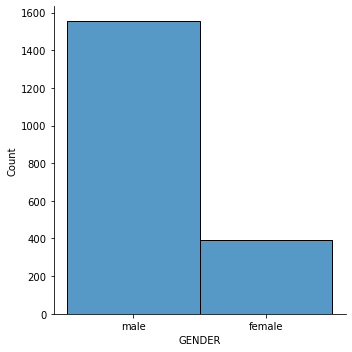

In [16]:
# Applying gender data to ap_chef


# creating the new variable
ap_chef['GENDER'] = 0


# loop to lookup gender in ap_chef on the gender file
index = 0

for name in ap_chef.loc[: , 'FIRST_NAME']:
    sex = gender.loc[:, 'Gender'][gender.loc[: , 'Name'] == name].to_string(index=False)
    ap_chef.loc[index, 'GENDER'] = sex
    index += 1
    
# Distibution of gender - checking for sufficient data in both categories
sns.displot(x = ap_chef['GENDER'])
plt.show()

In [17]:
# Creating a new column to take binary data
ap_chef['female'] = 0

# iterating over original column to change values in the new feature column
for index, value in ap_chef.iterrows():

    if ap_chef.loc[index, 'GENDER'] == 'female':
        ap_chef.loc[index, 'female'] = 1

In [18]:
# ANALYSIS
print("""
Stereotypes would suggest that gender can speak towards the probability of
one's relationship with cooking and the kitchen. We now have a variable we
can use to dertermine whether there is a more profitable segment between women
and men""")


Stereotypes would suggest that gender can speak towards the probability of
one's relationship with cooking and the kitchen. We now have a variable we
can use to dertermine whether there is a more profitable segment between women
and men


##  Totals have more significance?

In [19]:
# Adding variable for total number of times cancelled
ap_chef['TOTAL_CANCELLATIONS'] = ap_chef['CANCELLATIONS_BEFORE_NOON'] + ap_chef['CANCELLATIONS_AFTER_NOON']

# Adding variable for total number of logins
ap_chef['TOTAL_LOGINS'] = ap_chef['PC_LOGINS'] + ap_chef['MOBILE_LOGINS']

# Adding variable for total off_schedule deliveries
ap_chef['TOTAL_OFF_SCHEDULE'] = ap_chef['EARLY_DELIVERIES'] + ap_chef['LATE_DELIVERIES']

## Customer's overall experience (ratios to TOTAL_MEALS_ORDERED)

### Cancellations

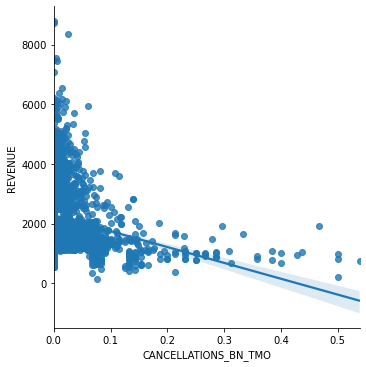

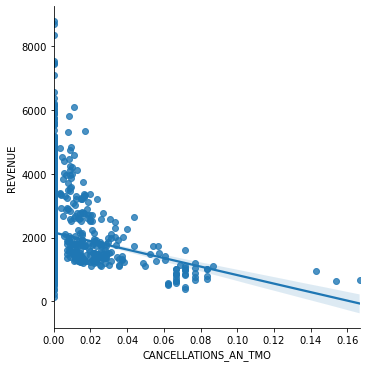

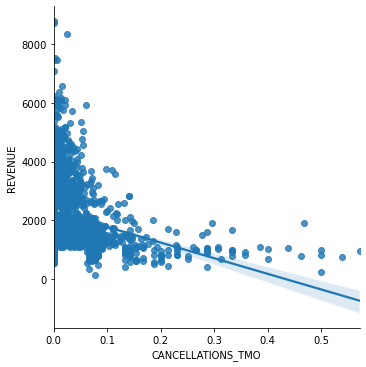


Does the ratio of times a person cancelled their order speak towards the
profitability of that customer? It is evident that any customer cancelling
their order more than 10% of the time falls in a braket of less profitable
customers. A summy variable will be created to represent that point.


In [20]:
# Creating the new variable
ap_chef['CANCELLATIONS_BN_TMO'] = ap_chef['CANCELLATIONS_BEFORE_NOON'] / ap_chef['TOTAL_MEALS_ORDERED']
ap_chef['CANCELLATIONS_AN_TMO'] = ap_chef['CANCELLATIONS_AFTER_NOON'] / ap_chef['TOTAL_MEALS_ORDERED']
ap_chef['CANCELLATIONS_TMO'] = ap_chef['TOTAL_CANCELLATIONS'] / ap_chef['TOTAL_MEALS_ORDERED']

# Visualizing the results
sns.lmplot(x = 'CANCELLATIONS_BN_TMO',
           y = 'REVENUE',
          data = ap_chef)
plt.show()

sns.lmplot(x = 'CANCELLATIONS_AN_TMO',
           y = 'REVENUE',
          data = ap_chef)
plt.show()

sns.lmplot(x = 'CANCELLATIONS_TMO',
           y = 'REVENUE',
          data = ap_chef)
plt.show()


# ANALYSIS
print("""
Does the ratio of times a person cancelled their order speak towards the
profitability of that customer? It is evident that any customer cancelling
their order more than 10% of the time falls in a braket of less profitable
customers. A summy variable will be created to represent that point.""")

In [21]:
# Creating a log of cancellations
ap_chef['log_CANCELLATIONS_TMO'] = np.log10(ap_chef['CANCELLATIONS_TMO']+0.1)

# creating the new dummy variable
ap_chef['CANCELLATIONS_TMO_01'] = 0

# loop to add values to new variable
for index, col in ap_chef.iterrows():
    if ap_chef.loc[index, 'CANCELLATIONS_TMO'] > 0.1:
        ap_chef.loc[index, 'CANCELLATIONS_TMO_01'] = 1

### Customer service

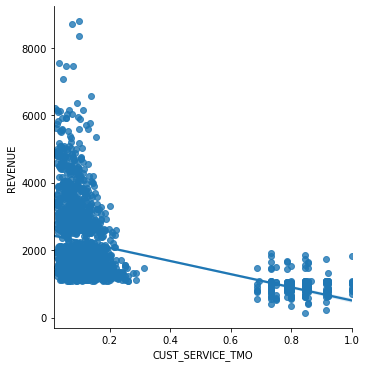


Contact with customer service for this type of service is usually associated
with a problem the customer was unable to resovle on the application.
Two groups jump out, with the lowest revenue levels for those having to contact
customer service over 50% of the time they place orders. This finding will be
added as a new variable.


In [22]:
# Creating the new variable
ap_chef['CUST_SERVICE_TMO'] = ap_chef['CONTACTS_W_CUSTOMER_SERVICE'] / ap_chef['TOTAL_MEALS_ORDERED']

# Visualizing the results
sns.lmplot(x = 'CUST_SERVICE_TMO',
           y = 'REVENUE',
          data = ap_chef)
plt.show()

# ANALYSIS
print("""
Contact with customer service for this type of service is usually associated
with a problem the customer was unable to resovle on the application.
Two groups jump out, with the lowest revenue levels for those having to contact
customer service over 50% of the time they place orders. This finding will be
added as a new variable.""")

In [23]:
# Creating a log of customer service
ap_chef['log_CUST_SERVICE_TMO'] = np.log10(ap_chef['CUST_SERVICE_TMO'])

# Creating the new dummy variable
ap_chef['CUST_SERVICE_TMO_05'] = 0

# loop to add values to new variable
for index, col in ap_chef.iterrows():
    if ap_chef.loc[index, 'CUST_SERVICE_TMO'] > 0.5:
        ap_chef.loc[index, 'CUST_SERVICE_TMO_05'] = 1

### Off schedule 

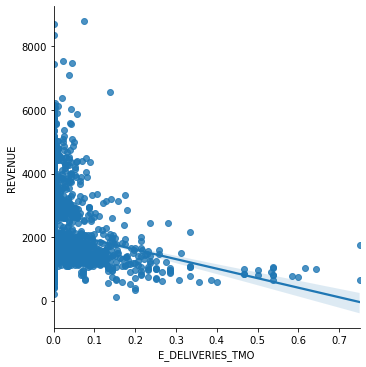

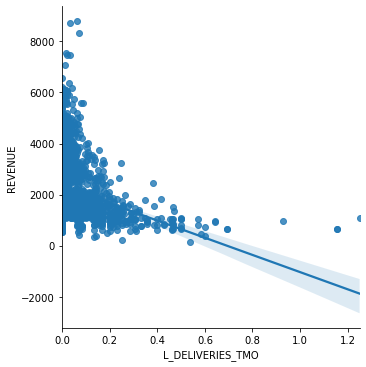

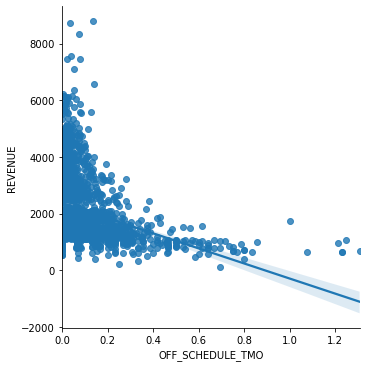


Customers clearly do not appreciate orders arriving late or early. With a
change in the pattern when customers experience off-schdule deliveries 40% of 
the time or more, we will create a dummy variable to represent that.


In [24]:
# Creating the new variables
ap_chef['E_DELIVERIES_TMO'] = ap_chef['EARLY_DELIVERIES'] / ap_chef['TOTAL_MEALS_ORDERED']
ap_chef['L_DELIVERIES_TMO'] = ap_chef['LATE_DELIVERIES'] / ap_chef['TOTAL_MEALS_ORDERED']
ap_chef['OFF_SCHEDULE_TMO'] = ap_chef['TOTAL_OFF_SCHEDULE'] / ap_chef['TOTAL_MEALS_ORDERED']

# Visualizing the results
sns.lmplot(x = 'E_DELIVERIES_TMO',
           y = 'REVENUE',
          data = ap_chef)
plt.show()

sns.lmplot(x = 'L_DELIVERIES_TMO',
           y = 'REVENUE',
          data = ap_chef)
plt.show()

sns.lmplot(x = 'OFF_SCHEDULE_TMO',
           y = 'REVENUE',
          data = ap_chef)
plt.show()

# ANALYSIS
print("""
Customers clearly do not appreciate orders arriving late or early. With a
change in the pattern when customers experience off-schdule deliveries 40% of 
the time or more, we will create a dummy variable to represent that.""")

In [25]:
# Creating a log of customer service
ap_chef['log_OFF_SCHEDULE_TMO'] = np.log10(ap_chef['OFF_SCHEDULE_TMO']+0.1)

# Creating the new dummy variable
ap_chef['OFF_SCHEDULE_TMO_04'] = 0

# loop to add values to new variable
for index, col in ap_chef.iterrows():
    if ap_chef.loc[index, 'OFF_SCHEDULE_TMO'] > 0.4:
        ap_chef.loc[index, 'OFF_SCHEDULE_TMO_04'] = 1

### Unique meals

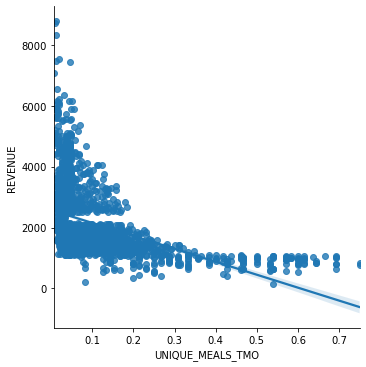


There appears to be a singnificant drop in the overall revenue when
customers order a wider variety of the meals on offer. Once again, we will 
explore whether the change in pattern around the 30% mark is significant.


In [26]:
# Creating the new variables
ap_chef['UNIQUE_MEALS_TMO'] = ap_chef['UNIQUE_MEALS_PURCH'] / ap_chef['TOTAL_MEALS_ORDERED']

# Visualizing the results
sns.lmplot(x = 'UNIQUE_MEALS_TMO',
           y = 'REVENUE',
          data = ap_chef)
plt.show()

# ANALYSIS
print("""
There appears to be a singnificant drop in the overall revenue when
customers order a wider variety of the meals on offer. Once again, we will 
explore whether the change in pattern around the 30% mark is significant.""")

In [27]:
# Creating a log of unique meals
ap_chef['log_UNIQUE_MEALS_TMO'] = np.log10(ap_chef['UNIQUE_MEALS_TMO'])

# Creating the new dummy variable
ap_chef['UNIQUE_MEALS_TMO_03'] = 0

# loop to add values to new variable
for index, col in ap_chef.iterrows():
    if ap_chef.loc[index, 'UNIQUE_MEALS_TMO'] > 0.3:
        ap_chef.loc[index, 'UNIQUE_MEALS_TMO_03'] = 1

## Categories viewed per unique order

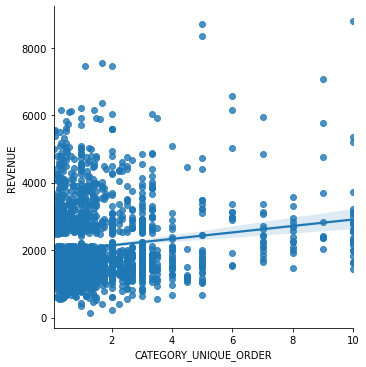


On average, how many categories are customers looking at per unique odrer they
place. This could speak to the efficiency of the suggestions algorithm regarding
how long it takes to find a meal of interest.


In [28]:
# Creating the new variables
ap_chef['CATEGORY_UNIQUE_ORDER'] = ap_chef['PRODUCT_CATEGORIES_VIEWED'] / ap_chef['UNIQUE_MEALS_PURCH']

# Visualizing the results
sns.lmplot(x = 'CATEGORY_UNIQUE_ORDER',
           y = 'REVENUE',
          data = ap_chef)
plt.show()

# ANALYSIS
print("""
On average, how many categories are customers looking at per unique odrer they
place. This could speak to the efficiency of the suggestions algorithm regarding
how long it takes to find a meal of interest.""")

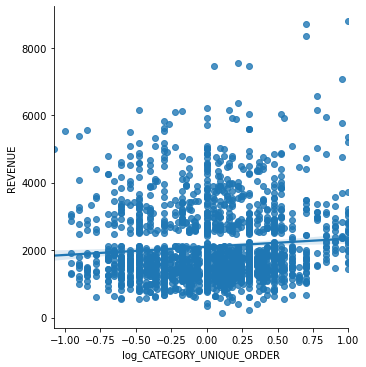

In [29]:
# Creating a log transformation for CATEGORY_UNIQUE_ORDER
ap_chef['log_CATEGORY_UNIQUE_ORDER'] = np.log10(ap_chef['CATEGORY_UNIQUE_ORDER'])

# Visualizing the results
sns.lmplot(x = 'log_CATEGORY_UNIQUE_ORDER',
           y = 'REVENUE',
          data = ap_chef)
plt.show()

# Initial OLS modeling 

## Gathering the data 

In [30]:
# saving feature rich dataset to excel
#ap_chef.to_excel('ap_chef_feature_rich.xlsx', index = False)

# dropping columns we won't need

    # dropping categorical variables
ap_chef_explanatory = ap_chef.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'GENDER'], axis=1)

    # dropping variables where log is preferrable
ap_chef_explanatory = ap_chef_explanatory.drop(['TOTAL_MEALS_ORDERED', 
                    'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 
                    'CANCELLATIONS_TMO', 'CUST_SERVICE_TMO',
                    'OFF_SCHEDULE_TMO', 'UNIQUE_MEALS_TMO',
                    'CATEGORY_UNIQUE_ORDER'], axis=1)

# formatting each explanatory variable for statsmodels
for val in ap_chef_explanatory:
    print (f"{val} +")

REVENUE +
CROSS_SELL_SUCCESS +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVERAGE_MEALS_PER_CUST +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
log_REVENUE +
log_TOTAL_MEALS_ORDERED +
log_AVG_TIME_PER_SITE_VISIT +
log_AVG_PREP_VID_TIME +
TOTAL_MEALS_ORDERED_20 +
TOTAL_PHOTOS_VIEWED_0 +
CONTACTS_W_CUSTOMER_SERVICE_10 +
AVG_CLICKS_PER_VISIT_10 +
junk +
personal +
professional +
female +
TOTAL_CANCELLATIONS +
TOTAL_LOGINS +
TOTAL_OFF_SCHEDULE +
CANCELLATIONS_BN_TMO +
CANCELLATIONS_AN_TMO +
log_CANCELLATIONS_TMO +
CANCELLATIONS_TMO_01 +
log_CUST_SERVICE_TMO +
CUST_SERVICE_TMO_05 +
E_DELIVERIES_TMO +
L_DELIVERIES_TMO +
log_OFF_SCHEDULE_TMO +
OFF_SCHEDULE_TMO_04 +
log_UNIQUE_MEALS_TMO +
UNIQUE_MEALS_

## OLS model with REVENUE as dependent variable

In [31]:
## Building a first model (REVENUE)

lm_full = smf.ols(formula = """REVENUE ~ CROSS_SELL_SUCCESS +
                                        log_TOTAL_MEALS_ORDERED +
                                        UNIQUE_MEALS_PURCH +
                                        CONTACTS_W_CUSTOMER_SERVICE +
                                        PRODUCT_CATEGORIES_VIEWED +
                                        log_AVG_PREP_VID_TIME +
                                        AVERAGE_MEALS_PER_CUST +
                                        MASTER_CLASSES_ATTENDED +
                                        MEDIAN_MEAL_RATING +
                                        TOTAL_PHOTOS_VIEWED +
                                        log_TOTAL_MEALS_ORDERED +
                                        TOTAL_MEALS_ORDERED_20 +
                                        CONTACTS_W_CUSTOMER_SERVICE_10 +
                                        AVG_CLICKS_PER_VISIT_10 +
                                        log_CUST_SERVICE_TMO +
                                        CUST_SERVICE_TMO_05 +
                                        log_UNIQUE_MEALS_TMO +
                                        UNIQUE_MEALS_TMO_03 +
                                        log_CATEGORY_UNIQUE_ORDER""",
                               data = ap_chef_explanatory)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     307.2
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        04:07:37   Log-Likelihood:                -15180.
No. Observations:                1946   AIC:                         3.040e+04
Df Residuals:                    1928   BIC:                         3.050e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -1379.5484    769.171     -1.794      0.073   -2888.043     128.946
CROSS_SELL_SUCCESS               -69.5503     28.933     -2.404      0.016    -126.294     -12.806
log_TOTAL_MEALS_ORDERED        -6131.0495    606.455    -10.110      0.000   -7320.427   -4941.672
UNIQUE_MEALS_PURCH               275.9533     16.392     16.835      0.000     243.806     308.101
CONTACTS_W_CUSTOMER_SERVICE      378.0133     41.140      9.189      0.000     297.330     458.696
PRODUCT_CATEGORIES_VIEWED         59.9869     15.378      3.901      0.000      29.827      90.146
log_AVG_PREP_VID_TIME           2462.2636    198.152     12.426      0.000    2073.650    2850.878
AVERAGE_MEALS_PER_CUST           -56.8085     14.938     -3.803      0.000     -86.106     -27.511
MASTER_CLASSES_ATTENDED          162.5867     24.563      6.619      0.000     114.414     210.759
MEDIAN_MEAL_RATING               171.1564     25.747      6.648      0.000     120.661     221.652
TOTAL_PHOTOS_VIEWED                0.6793      0.085      7.986      0.000       0.512       0.846
TOTAL_MEALS_ORDERED_20         -2506.7539    620.393     -4.041      0.000   -3723.466   -1290.042
CONTACTS_W_CUSTOMER_SERVICE_10 -1773.2208    321.013     -5.524      0.000   -2402.789   -1143.652
AVG_CLICKS_PER_VISIT_10         -648.5551     57.227    -11.333      0.000    -760.789    -536.321
log_CUST_SERVICE_TMO           -3307.5899    549.843     -6.016      0.000   -4385.940   -2229.240
CUST_SERVICE_TMO_05            -1773.2208    321.013     -5.524      0.000   -2402.789   -1143.652
log_UNIQUE_MEALS_TMO           -3850.7997    215.967    -17.831      0.000   -4274.352   -3427.247
UNIQUE_MEALS_TMO_03              233.4401     82.590      2.826      0.005      71.464     395.416
log_CATEGORY_UNIQUE_ORDER       -557.8200    152.844     -3.650      0.000    -857.577    -258.063
==============================================================================
Omnibus:                      639.541   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6755.691
Skew:                           1.232   Prob(JB):                         0.00
Kurtosis:                      11.789   Cond. No.                     2.77e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## OLS model with log_REVENUE as dependent variable

In [32]:
## Building a second model (log_REVENUE)
lm_full = smf.ols(formula = """log_REVENUE ~ CROSS_SELL_SUCCESS +
                                            UNIQUE_MEALS_PURCH +
                                            CONTACTS_W_CUSTOMER_SERVICE +
                                            PRODUCT_CATEGORIES_VIEWED +
                                            REFRIGERATED_LOCKER +
                                            AVERAGE_MEALS_PER_CUST +
                                            MASTER_CLASSES_ATTENDED +
                                            MEDIAN_MEAL_RATING +
                                            TOTAL_PHOTOS_VIEWED +
                                            log_TOTAL_MEALS_ORDERED +
                                            log_AVG_PREP_VID_TIME +
                                            TOTAL_MEALS_ORDERED_20 +
                                            TOTAL_PHOTOS_VIEWED_0 +
                                            CONTACTS_W_CUSTOMER_SERVICE_10 +
                                            AVG_CLICKS_PER_VISIT_10 +
                                            junk +
                                            personal +
                                            professional +
                                            CANCELLATIONS_AN_TMO +
                                            log_CUST_SERVICE_TMO +
                                            CUST_SERVICE_TMO_05 +
                                            log_UNIQUE_MEALS_TMO +
                                            log_CATEGORY_UNIQUE_ORDER """,
                               data = ap_chef_explanatory)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()

# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     357.1
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        04:07:37   Log-Likelihood:                 1805.5
No. Observations:                1946   AIC:                            -3567.
Df Residuals:                    1924   BIC:                            -3444.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.7391      0.094     18.573      0.000       1.555       1.923
CROSS_SELL_SUCCESS                -0.0119      0.005     -2.415      0.016      -0.022      -0.002
UNIQUE_MEALS_PURCH                 0.0496      0.003     18.633      0.000       0.044       0.055
CONTACTS_W_CUSTOMER_SERVICE        0.0520      0.007      7.790      0.000       0.039       0.065
PRODUCT_CATEGORIES_VIEWED          0.0110      0.002      4.396      0.000       0.006       0.016
REFRIGERATED_LOCKER               -0.0149      0.007     -2.146      0.032      -0.028      -0.001
AVERAGE_MEALS_PER_CUST            -0.0138      0.002     -5.702      0.000      -0.019      -0.009
MASTER_CLASSES_ATTENDED            0.0264      0.004      6.612      0.000       0.019       0.034
MEDIAN_MEAL_RATING                 0.0406      0.004      9.640      0.000       0.032       0.049
TOTAL_PHOTOS_VIEWED             4.439e-05    1.8e-05      2.470      0.014    9.15e-06    7.96e-05
log_TOTAL_MEALS_ORDERED           -0.9162      0.098     -9.302      0.000      -1.109      -0.723
log_AVG_PREP_VID_TIME              0.5288      0.032     16.409      0.000       0.466       0.592
TOTAL_MEALS_ORDERED_20            -0.3758      0.100     -3.740      0.000      -0.573      -0.179
TOTAL_PHOTOS_VIEWED_0              0.0183      0.006      2.856      0.004       0.006       0.031
CONTACTS_W_CUSTOMER_SERVICE_10    -0.3135      0.052     -6.016      0.000      -0.416      -0.211
AVG_CLICKS_PER_VISIT_10           -0.0700      0.009     -7.533      0.000      -0.088      -0.052
junk                               0.5804      0.031     18.459      0.000       0.519       0.642
personal                           0.5805      0.031     18.576      0.000       0.519       0.642
professional                       0.5782      0.031     18.363      0.000       0.516       0.640
CANCELLATIONS_AN_TMO              -0.5133      0.173     -2.960      0.003      -0.853      -0.173
log_CUST_SERVICE_TMO              -0.3874      0.089     -4.336      0.000      -0.563      -0.212
CUST_SERVICE_TMO_05               -0.3135      0.052     -6.016      0.000      -0.416      -0.211
log_UNIQUE_MEALS_TMO              -0.6959      0.035    -19.900      0.000      -0.765      -0.627
log_CATEGORY_UNIQUE_ORDER         -0.1047      0.025     -4.219      0.000      -0.153      -0.056
==============================================================================
Omnibus:                      357.857   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2333.783
Skew:                          -0.697   Prob(JB):                         0.00
Kurtosis:                       8.181   Cond. No.                     4.35e+18
===============

# Regressions with scikit-learn

## Preparing the data

### List to collect model evaluation criteria

In [33]:
# Setting criteria as headers
criteria = ['Model type', 'Model details', 'Train score', 'Test score',
            'Train-Test gap', 'Model size', 'Model coefficients and variables']

# building list with headers specified
performance = pd.DataFrame(columns = criteria)

### Optimized variables lists

In [34]:
# Capturing all variables found to optimize OLS with REV
OLS_variables = ['CROSS_SELL_SUCCESS', 'log_TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
                'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'log_AVG_PREP_VID_TIME',
                'AVERAGE_MEALS_PER_CUST', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                'TOTAL_PHOTOS_VIEWED', 'log_TOTAL_MEALS_ORDERED', 'TOTAL_MEALS_ORDERED_20',
                'CONTACTS_W_CUSTOMER_SERVICE_10', 'AVG_CLICKS_PER_VISIT_10', 'log_CUST_SERVICE_TMO',
                'CUST_SERVICE_TMO_05', 'log_UNIQUE_MEALS_TMO', 'UNIQUE_MEALS_TMO_03',
                'log_CATEGORY_UNIQUE_ORDER']

# Capturing all variables found to optimize OLS with log_REV
OLS_log_variables = ['CROSS_SELL_SUCCESS', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
                 'PRODUCT_CATEGORIES_VIEWED', 'REFRIGERATED_LOCKER', 'AVERAGE_MEALS_PER_CUST',
                 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'TOTAL_PHOTOS_VIEWED',
                 'log_TOTAL_MEALS_ORDERED', 'log_AVG_PREP_VID_TIME', 'TOTAL_MEALS_ORDERED_20',
                 'TOTAL_PHOTOS_VIEWED_0', 'CONTACTS_W_CUSTOMER_SERVICE_10', 'junk',
                 'personal', 'professional', 'AVG_CLICKS_PER_VISIT_10',
                 'CANCELLATIONS_AN_TMO', 'log_CUST_SERVICE_TMO', 'CUST_SERVICE_TMO_05',
                 'log_UNIQUE_MEALS_TMO', 'log_CATEGORY_UNIQUE_ORDER']

# Capturing all variables found to optimize ARD with log_REV
ARD_log_variables = ['CROSS_SELL_SUCCESS', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
                 'AVERAGE_MEALS_PER_CUST', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                 'log_TOTAL_MEALS_ORDERED', 'log_AVG_PREP_VID_TIME', 'TOTAL_MEALS_ORDERED_20',
                 'TOTAL_PHOTOS_VIEWED_0', 'CONTACTS_W_CUSTOMER_SERVICE_10', 'AVG_CLICKS_PER_VISIT_10',
                 'CANCELLATIONS_AN_TMO', 'log_CUST_SERVICE_TMO', 'CUST_SERVICE_TMO_05',
                 'E_DELIVERIES_TMO', 'L_DELIVERIES_TMO', 'log_UNIQUE_MEALS_TMO']

### Train - Test split for different scenarios 

In [35]:
# Dropping the dependent variables
ap_chef_data = ap_chef_explanatory.drop(['REVENUE', 'log_REVENUE'], axis = 1)

# Creting our target datasets
ap_chef_target = ap_chef_explanatory['REVENUE']
ap_chef_log_target = ap_chef_explanatory['log_REVENUE']

In [36]:
## REV, all data

# preparing training and testing sets (REV, all data)
X_train, X_test, y_train, y_test = train_test_split(
            ap_chef_data,
            ap_chef_target,
            test_size = 0.25,
            random_state = 219)


## log_REV, all data

# preparing training and testing sets (log_REV, all data)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
            ap_chef_data,
            ap_chef_log_target,
            test_size = 0.25,
            random_state = 219)


## REV, OLS data

# Dataset with only OLS 'approved' variables with REV
ap_chef_OLS = ap_chef_data[OLS_variables]

# preparing training and testing sets (REV, OLS variables only)
X_train_OLS, X_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ap_chef_OLS,
            ap_chef_target,
            test_size = 0.25,
            random_state = 219)


## log_REV, OLS_log data

# Dataset with only OLS 'approved' variables with log_REV
ap_chef_OLS_log = ap_chef_data[OLS_log_variables]

# preparing training and testing sets (log_REV, OLS variables only)
X_train_OLS_log, X_test_OLS_log, y_train_OLS_log, y_test_OLS_log = train_test_split(
            ap_chef_OLS_log,
            ap_chef_log_target,
            test_size = 0.25,
            random_state = 219)


# log_REV, ARD data

# Dataset with only OLS 'approved' variables with log_REV
ap_chef_ARD_log = ap_chef_explanatory[ARD_log_variables]

# preparing training and testing sets (log_REV, OLS variables only)
X_train_ARD_log, X_test_ARD_log, y_train_ARD_log, y_test_ARD_log = train_test_split(
            ap_chef_ARD_log,
            ap_chef_log_target,
            test_size = 0.25,
            random_state = 219)

## LinearRegression()

### With REVENUE and OLS data

In [37]:
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(X_train_OLS, y_train_OLS)

# PREDICTING on new data
lr_pred = lr_fit.predict(X_test_OLS)

# SCORING results
lr_train_score = lr.score(X_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(X_test_OLS, y_test_OLS).round(4)

# printing the results
print('OLS Training Score :', lr_train_score)
print('OLS Testing Score  :', lr_test_score)

# displaying and saving the gap between training and testing
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)
print('OLS Train-Test Gap :', lr_test_gap)

OLS Training Score : 0.7273
OLS Testing Score  : 0.7315
OLS Train-Test Gap : 0.0042


In [38]:
# zipping each feature name to its coefficient
model_values = zip(ap_chef_OLS.columns,
                   lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# saving each feature-coefficient pair one by one
for val in model_values:
    model_lst.append(val)

# saving results to performance dataframe
performance.loc[0] = ['OLS', 'Revenue and OLS data', lr_train_score, lr_test_score,
                  lr_test_gap, len(model_lst), model_lst]

### With log_REVENUE and OLS_log data

In [39]:
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(X_train_OLS_log, y_train_OLS_log)

# PREDICTING on new data
lr_pred = lr_fit.predict(X_test_OLS_log)

# SCORING results
lr_train_score_i = lr.score(X_train_OLS_log, y_train_OLS_log).round(4)
lr_test_score_i = lr.score(X_test_OLS_log, y_test_OLS_log).round(4)

# printing the results
print('OLS Training Score :', lr_train_score_i)
print('OLS Testing Score  :', lr_test_score_i)

# displaying and saving the gap between training and testing
lr_test_gap_i = abs(lr_train_score_i - lr_test_score_i).round(4)
print('OLS Train-Test Gap :', lr_test_gap_i)

OLS Training Score : 0.7965
OLS Testing Score  : 0.79
OLS Train-Test Gap : 0.0065


In [40]:
# zipping each feature name to its coefficient
model_values = zip(ap_chef_OLS_log.columns,
                   lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# saving each feature-coefficient pair one by one
for val in model_values:
    model_lst.append(val)

# dropping coefficients that are equal to zero
for feature, coefficient in model_lst:
        if coefficient == 0:
            model_lst.remove((feature, coefficient))

# dropping coefficients that are equal to zero
for feature, coefficient in model_lst:
        if coefficient == 0:
            model_lst.remove((feature, coefficient))

# saving results to performance dataframe
performance.loc[1] = ['OLS', 'log_Revenue and OLS_log data', lr_train_score_i,
                      lr_test_score_i, lr_test_gap_i, len(model_lst), model_lst]

### With log_REVENUE and ARD_log data

In [41]:
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(X_train_ARD_log, y_train_ARD_log)

# PREDICTING on new data
lr_pred = lr_fit.predict(X_test_ARD_log)

# SCORING results
lr_train_score_ii = lr.score(X_train_ARD_log, y_train_ARD_log).round(4)
lr_test_score_ii = lr.score(X_test_ARD_log, y_test_ARD_log).round(4)

# printing the results
print('OLS Training Score :', lr_train_score_ii)
print('OLS Testing Score  :', lr_test_score_ii)

# displaying and saving the gap between training and testing
lr_test_gap_ii = abs(lr_train_score_ii - lr_test_score_ii).round(4)
print('OLS Train-Test Gap :', lr_test_gap_ii)

OLS Training Score : 0.7941
OLS Testing Score  : 0.7859
OLS Train-Test Gap : 0.0082


In [42]:
# zipping each feature name to its coefficient
model_values = zip(ap_chef_ARD_log.columns,
                   lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# saving each feature-coefficient pair one by one
for val in model_values:
    model_lst.append(val)

# saving results to performance dataframe
performance.loc[2] = ['OLS', 'log_Revenue and ARD_log data', lr_train_score_ii,
                      lr_test_score_ii, lr_test_gap_ii, len(model_lst), model_lst]

## Lasso()

### With REVENUE and all data

In [43]:
# INSTANTIATING a model object
lasso_model = Lasso(alpha = 1.0, normalize = False)

# FITTING to the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

# SCORING the results
print('Lasso Training Score :', lasso_train_score)
print('Lasso Testing Score  :', lasso_test_score)

# displaying and saving the gap between training and testing
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)
print('Lasso Train-Test Gap :', lasso_test_gap)

Lasso Training Score : 0.7225
Lasso Testing Score  : 0.72
Lasso Train-Test Gap : 0.0025


In [44]:
# zipping each feature name to its coefficient
model_values = zip(ap_chef_data.columns, lasso_fit.coef_.round(decimals = 2))

# setting up a placeholder list to store model features
model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]

# saving each feature-coefficient pair one by one
for val in model_values:
    model_lst.append(val)

# dropping coefficients that are equal to zero
for feature, coefficient in model_lst:
        if coefficient == 0:
            model_lst.remove((feature, coefficient))
    
# saving results to performance dataframe
performance.loc[3] = ['Lasso', 'Revenue and all data', lasso_train_score,
                      lasso_test_score, lasso_test_gap, len(model_lst), model_lst]

### With REVENUE and all data normalized

In [45]:
# INSTANTIATING a model object
lasso_model = Lasso(alpha = 1.0, normalize = True)

# FITTING to the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

# saving scoring data for future use
lasso_train_score_i = lasso_model.score(X_train, y_train).round(4)
lasso_test_score_i  = lasso_model.score(X_test, y_test).round(4)

# SCORING the results
print('Lasso Training Score :', lasso_train_score_i)
print('Lasso Testing Score  :', lasso_test_score_i)


# displaying and saving the gap between training and testing
lasso_test_gap_i = abs(lasso_train_score_i - lasso_test_score_i).round(4)
print('Lasso Train-Test Gap :', lasso_test_gap_i)

Lasso Training Score : 0.6762
Lasso Testing Score  : 0.681
Lasso Train-Test Gap : 0.0048


In [46]:
# zipping each feature name to its coefficient
model_values = zip(ap_chef_data.columns, lasso_fit.coef_.round(decimals = 2))

# setting up a placeholder list to store model features
model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]

# saving out each feature-coefficient pair one by one
for val in model_values:
    model_lst.append(val)

# dropping coefficients that are equal to zero
for feature, coefficient in model_lst:
        if coefficient == 0:
            model_lst.remove((feature, coefficient))

# dropping coefficients that are equal to zero
for feature, coefficient in model_lst:
        if coefficient == 0:
            model_lst.remove((feature, coefficient))
        
# dropping coefficients that are equal to zero
for feature, coefficient in model_lst:
        if coefficient == 0:
            model_lst.remove((feature, coefficient))
            
# dropping coefficients that are equal to zero
for feature, coefficient in model_lst:
        if coefficient == 0:
            model_lst.remove((feature, coefficient))
    
# saving results to performance dataframe
performance.loc[4] = ['Lasso', 'Revenue and all data normalized', lasso_train_score_i,
                      lasso_test_score_i, lasso_test_gap_i, len(model_lst), model_lst]

## ARDRegression()

### With log_REVENUE and all data 

In [47]:
# INSTANTIATING a model object
ard_model = ARDRegression(normalize = False)

# FITTING the training data
ard_fit = ard_model.fit(X_train_log, y_train_log)

# PREDICTING on new data
ard_pred = ard_model.predict(X_test_log)

# SCORING the model
ard_train_score = ard_model.score(X_train_log, y_train_log).round(decimals=4)
ard_test_score  = ard_model.score(X_test_log, y_test_log).round(decimals=4)

# printing the scores
print('Training Score:', ard_train_score)
print('Testing Score :', ard_test_score)

# displaying and saving the gap between training and testing
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)
print('ARD Train-Test Gap :', ard_test_gap)

Training Score: 0.7938
Testing Score : 0.7857
ARD Train-Test Gap : 0.0081


In [48]:
# zipping each feature name to its coefficient
model_values = zip(ap_chef_data.columns, ard_fit.coef_.round(decimals = 5))

# setting up a placeholder list to store model features
model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]

# printing out each feature-coefficient pair one by one
for val in model_values:
    model_lst.append(val)
    
# dropping coefficients that are equal to zero
for feature, coefficient in model_lst:        
        if coefficient == 0:
            model_lst.remove((feature, coefficient))
    
# dropping coefficients that are equal to zero
for feature, coefficient in model_lst:        
        if coefficient == 0:
            model_lst.remove((feature, coefficient))
    
# dropping coefficients that are equal to zero
for feature, coefficient in model_lst:        
        if coefficient == 0:
            model_lst.remove((feature, coefficient))
    
# dropping coefficients that are equal to zero
for feature, coefficient in model_lst:        
        if coefficient == 0:
            model_lst.remove((feature, coefficient))
            
# saving results to performance dataframe
performance.loc[5] = ['ARD', 'log_Revenue and all data', ard_train_score,
                      ard_test_score, ard_test_gap, len(model_lst), model_lst]

### With log_REVENUE and OLS_log data

In [49]:
# INSTANTIATING a model object
ard_model = ARDRegression(normalize = False)

# FITTING the training data
ard_fit = ard_model.fit(X_train_OLS_log, y_train_OLS_log)

# PREDICTING on new data
ard_pred = ard_model.predict(X_test_OLS_log)

# saving scoring data for future use
ard_train_score_i = ard_model.score(X_train_OLS_log, y_train_OLS_log).round(decimals=4)
ard_test_score_i  = ard_model.score(X_test_OLS_log, y_test_OLS_log).round(decimals=4)

# Printing the scores
print('Training Score:', ard_train_score_i)
print('Testing Score :', ard_test_score_i)

# displaying and saving the gap between training and testing
ard_test_gap_i = abs(ard_train_score_i - ard_test_score_i).round(4)
print('ARD Train-Test Gap :', ard_test_gap_i)

Training Score: 0.7935
Testing Score : 0.787
ARD Train-Test Gap : 0.0065


In [50]:
# zipping each feature name to its coefficient
model_values = zip(ap_chef_OLS_log.columns, ard_fit.coef_.round(decimals = 5))

# setting up a placeholder list to store model features
model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]

# printing out each feature-coefficient pair one by one
for val in model_values:
    model_lst.append(val)
    
# dropping coefficients that are equal to zero
for feature, coefficient in model_lst:        
        if coefficient == 0:
            model_lst.remove((feature, coefficient))
            
# saving results to performance dataframe
performance.loc[6] = ['ARD', 'log_Revenue and OLS_log data', ard_train_score_i,
                      ard_test_score_i, ard_test_gap_i, len(model_lst), model_lst]

## KNeighborsRegressor()

### With log_REVENUE and all data

#### Preparing the data

In [51]:
# SCALING the data

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with housing_data
scaler.fit(ap_chef_data)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(ap_chef_data)

# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

In [52]:
# train_test_split for standardized data
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            ap_chef_log_target,
            test_size = 0.25,
            random_state = 219)

#### Determining optimal number of neighbors

In [53]:
## Not running for time optimization

# creating lists for training set accuracy and test set accuracy
#training_accuracy = []
#test_accuracy = []

# building a visualization of 1 to 50 neighbors
#ap_chef_settings = range(1, 41)

#for n_neighbors in ap_chef_settings:
    # Building the model
#    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
#    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
#    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
#    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))

# plotting the visualization
#fig, ax = plt.subplots(figsize=(12,8))
#plt.plot(ap_chef_settings, training_accuracy, label = "training accuracy")
#plt.plot(ap_chef_settings, test_accuracy,     label = "test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.legend()
#plt.show()

# finding the optimal number of neighbors
#opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
#print(f"""The optimal number of neighbors is {opt_neighbors}""")

#### Running the model with optimized number of neighbors

In [54]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                               n_neighbors = 30)

# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)

# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test_STAND)

# SCORING the results
knn_stand_train_score = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_test_score  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)

# saving results for future use
print('KNN Training Score:', knn_stand_train_score)
print('KNN Testing Score :', knn_stand_test_score)

# displaying and saving the gap between training and testing
knn_stand_test_gap = abs(knn_stand_train_score - knn_stand_test_score).round(4)
print('KNN Train-Test Gap:', knn_stand_test_gap)

# saving results to performance dataframe
performance.loc[7] = ['KNN', 'log_Revenue and all data', knn_stand_train_score,
                      knn_stand_test_score, knn_stand_test_gap, 'NA', 'NA']

KNN Training Score: 0.6919
KNN Testing Score : 0.6515
KNN Train-Test Gap: 0.0404


### With log_REVENUE and OLS_log data 

#### Preparing the data 

In [55]:
# SCALING the data

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with housing_data
scaler.fit(ap_chef_OLS_log)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(ap_chef_OLS_log)

# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

In [56]:
# train_test_split for standardized data
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            ap_chef_log_target,
            test_size = 0.25,
            random_state = 219)

#### Determining optimal number of neighbors

In [57]:
## Not running for time optimization

# creating lists for training set accuracy and test set accuracy
#training_accuracy = []
#test_accuracy = []

# building a visualization of 1 to 50 neighbors
#ap_chef_settings = range(1, 21)

#for n_neighbors in ap_chef_settings:
    # Building the model
#    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
#    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
#    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
#    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))

# plotting the visualization
#fig, ax = plt.subplots(figsize=(12,8))
#plt.plot(ap_chef_settings, training_accuracy, label = "training accuracy")
#plt.plot(ap_chef_settings, test_accuracy,     label = "test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.legend()
#plt.show()

# finding the optimal number of neighbors
#opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
#print(f"""The optimal number of neighbors is {opt_neighbors}""")

#### Running the model with the optimal number of neighbors

In [58]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                               n_neighbors = 17)

# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)

# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test_STAND)

# SCORING the results
knn_stand_train_score_i = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_test_score_i  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)

# saving results for future use
print('KNN Training Score:', knn_stand_train_score_i)
print('KNN Testing Score :', knn_stand_test_score_i)

# displaying and saving the gap between training and testing
knn_stand_test_gap_i = abs(knn_stand_train_score_i - knn_stand_test_score_i).round(4)
print('KNN Train-Test Gap:', knn_stand_test_gap_i)

# saving results to performance dataframe
performance.loc[8] = ['KNN', 'log_Revenue and OLS_log data', knn_stand_train_score_i,
                      knn_stand_test_score_i, knn_stand_test_gap_i, 'NA', 'NA']

KNN Training Score: 0.7272
KNN Testing Score : 0.693
KNN Train-Test Gap: 0.0342


### With log_REVENUE and ARD_log data 

#### Preparing the data 

In [59]:
# SCALING the data

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with housing_data
scaler.fit(ap_chef_ARD_log)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(ap_chef_ARD_log)

# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

In [60]:
# train_test_split for standardized data
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            ap_chef_log_target,
            test_size = 0.25,
            random_state = 219)

#### Determining optimal number of neighbors

In [61]:
## Not running for time optimization

# creating lists for training set accuracy and test set accuracy
#training_accuracy = []
#test_accuracy = []

# building a visualization of 1 to 50 neighbors
#ap_chef_settings = range(1, 21)

#for n_neighbors in ap_chef_settings:
    # Building the model
#    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
#    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
#    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
#    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))

# plotting the visualization
#fig, ax = plt.subplots(figsize=(12,8))
#plt.plot(ap_chef_settings, training_accuracy, label = "training accuracy")
#plt.plot(ap_chef_settings, test_accuracy,     label = "test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.legend()
#plt.show()

# finding the optimal number of neighbors
#opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
#print(f"""The optimal number of neighbors is {opt_neighbors}""")

#### Running the model with the optimal number of neighbors

In [62]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                               n_neighbors = 10)

# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)

# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test_STAND)

# SCORING the results
knn_stand_train_score_ii = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_test_score_ii  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)

# saving results for future use
print('KNN Training Score:', knn_stand_train_score_ii)
print('KNN Testing Score :', knn_stand_test_score_ii)

# displaying and saving the gap between training and testing
knn_stand_test_gap_ii = abs(knn_stand_train_score_ii - knn_stand_test_score_ii).round(4)
print('KNN Train-Test Gap:', knn_stand_test_gap_ii)

# saving results to performance dataframe
performance.loc[9] = ['KNN', 'log_Revenue and ARD_log data', knn_stand_train_score_ii,
                      knn_stand_test_score_ii, knn_stand_test_gap_ii, 'NA', 'NA']

KNN Training Score: 0.7902
KNN Testing Score : 0.741
KNN Train-Test Gap: 0.0492


# Comparing performances

In [63]:
# printing a summary of the performances of all models run
performance.head(n=10)

,Model type,Model details,Train score,Test score,Train-Test gap,Model size,Model coefficients and variables
0,OLS,Revenue and OLS data,0.7273,0.7315,0.0042,20,"[(intercept, -1482.94), (CROSS_SELL_SUCCESS, -..."
1,OLS,log_Revenue and OLS_log data,0.7965,0.7900,0.0065,20,"[(intercept, 2.32), (CROSS_SELL_SUCCESS, -0.02..."
2,OLS,log_Revenue and ARD_log data,0.7941,0.7859,0.0082,19,"[(intercept, 2.33), (CROSS_SELL_SUCCESS, -0.02..."
3,Lasso,Revenue and all data,0.7225,0.7200,0.0025,36,"[(intercept, -4314.87), (CROSS_SELL_SUCCESS, -..."
4,Lasso,Revenue and all data normalized,0.6762,0.6810,0.0048,12,"[(intercept, -4072.34), (CROSS_SELL_SUCCESS, -..."
5,ARD,log_Revenue and all data,0.7938,0.7857,0.0081,19,"[(intercept, 2.22), (CROSS_SELL_SUCCESS, -0.01..."
6,ARD,log_Revenue and OLS_log data,0.7935,0.7870,0.0065,19,"[(intercept, 2.2), (CROSS_SELL_SUCCESS, -0.012..."
7,KNN,log_Revenue and all data,0.6919,0.6515,0.0404,NA,NA
8,KNN,log_Revenue and OLS_log data,0.7272,0.6930,0.0342,NA,NA
9,KNN,log_Revenue and ARD_log data,0.7902,0.7410,0.0492,NA,NA


In [64]:
# highlighting top models

print(f"""
Model - depend  - data         Train Score      Test Score      Train-Test Gap
-------------------------      -----------      ----------      --------------
LR    - log_REV - OLS_log      {lr_train_score_i}           {lr_test_score_i}            {lr_test_gap_i}
LR    - log_REV - ARD_log      {lr_train_score_ii}           {lr_test_score_ii}          {lr_test_gap_ii}
ARD   - log_REV - all          {ard_train_score}           {ard_test_score}          {ard_test_gap}
ARD   - log_REV - OLS_log      {ard_train_score_i}           {ard_test_score_i}           {ard_test_gap_i}
""")

print("""
The above models all meet the criteria set with test scores > 0.75, and a train-
test gap < 0.05, and have reasonable model sizes.
Top model to recommend: linear regression using a log transformation of REVENUE
as the dependent variable, and the OLS optimized list of independent variables.
""")

print(performance.iloc[1, 0:6])

print("""
Model coefficiencts and variables:""")

for pair in performance.loc [1, 'Model coefficients and variables']:
    print(pair)


Model - depend  - data         Train Score      Test Score      Train-Test Gap
-------------------------      -----------      ----------      --------------
LR    - log_REV - OLS_log      0.7965           0.79            0.0065
LR    - log_REV - ARD_log      0.7941           0.7859          0.0082
ARD   - log_REV - all          0.7938           0.7857          0.0081
ARD   - log_REV - OLS_log      0.7935           0.787           0.0065


The above models all meet the criteria set with test scores > 0.75, and a train-
test gap < 0.05, and have reasonable model sizes.
Top model to recommend: linear regression using a log transformation of REVENUE
as the dependent variable, and the OLS optimized list of independent variables.

Model type                                 OLS
Model details     log_Revenue and OLS_log data
Train score                             0.7965
Test score                              0.7900
Train-Test gap                          0.0065
Model size                  